#  <span style="color:blue">  Logistic regression Basic concepts</span>

## <span style="color:red">Licence Professionnelle en Big Data et Intelligence Artificielle </span>

### <span style="color:purple">Réalisée par:</span> EZ-ZARZOURI Houda

## <span style="color:red">Objectifs :</span>
Dans cet exercice, nous allons implémenter la régression logistique et voir comment elle fonctionne sur des données. Nous suivrons différentes étapes pour mettre en place et tester un modèle de régression logistique :

+ Importons les bibliothèques et les données, en identifiant les variables dépendantes et indépendantes.
+ Codons les fonctions nécessaires (fonction sigmoïde, le modèle, la fonction de coût, le gradient et la descente de gradient).
+ Évaluons les performances du modèle.

### <span style="color:red">Implementation of logistic regression</span> 

### <span style="color:red">. Import the librairies and the data</span>

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


### <span style="color:red"> 1. Data load and visualization </span>

+ Générons l'ensemble de données en choisissant le nombre de caractéristiques = 2 et le nombre de centres = 2 car nous mettons en œuvre un modèle polynomial avec une caractéristique.
+ Le paramètre "nombre de centres" (centers) dans la fonction make_blobs spécifie le nombre de clusters que l'on souhaite générer dans l'ensemble de données synthétiques. Dans ce cas, avec "nombre de centres = 2", nous demandons à la fonction de générer deux clusters dans l'ensemble de données.

In [6]:
np.random.seed(0)
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

+ Visualisons l'ensemble de données
La fonction scatter de la bibliothèque matplotlib permet de créer un graphique de dispersion en plaçant un point pour chaque paire de valeurs dans les tableaux X[:,0] et X[:,1]. Les couleurs des points sont déterminées par les valeurs de y, et sont affectées en utilisant le paramètre c de la fonction scatter.

Le paramètre cmap spécifie la carte de couleurs utilisée pour la représentation des couleurs. Ici, 'bwr' signifie "bleu-blanc-rouge" et utilise une gamme de couleurs allant du bleu (pour la première classe) au rouge (pour la deuxième classe).

Enfin, plt.show() est utilisé pour afficher le graphique de dispersion créé.

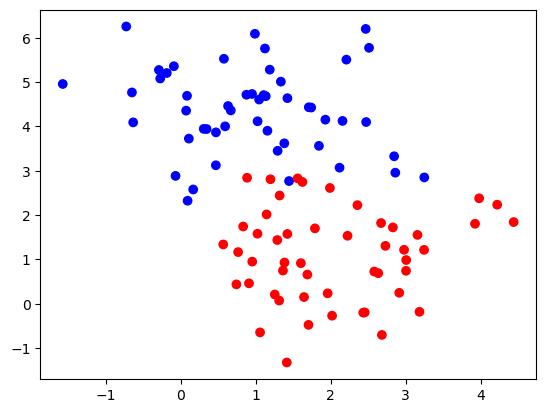

In [7]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap='bwr')
plt.show()

+ Affichons les dimensions de x et y, et complétons la dimension y en utilisant la fonction adéquate.

In [8]:
print("Dimensions de X : ", X.shape)
print("Dimensions de y : ", y.shape)
# Complétons la dimension y avec reshape
y = y.reshape(-1,1)
print("Dimensions de y après reshape : ", y.shape)

Dimensions de X :  (100, 2)
Dimensions de y :  (100,)
Dimensions de y après reshape :  (100, 1)


### <span style="color:red">2. Dataset preparation and Model parameters’ initialization</span>

Dans cet exercice, nous ne prendrons pas de première colonne supplémentaire pour X et ne la fixerons pas à tous les uns, mais nous initialiserons plutôt :
+ Les paramètres initiaux theta (un paramètre pour chaque caractéristique) en utilisant la fonction random.randn(). 
+ Le biais qui représentera theta0 dans la fonction hypothèse.

In [9]:
# Initialisation des paramètres du modèle
theta = np.random.randn(2, 1) # 2 paramètres (un pour chaque caractéristique) 
biais = 0 # initialisation du biais (theta0)

print("theta : ")
print(theta)
print("bias : ")
print(biais)

theta : 
[[1.76405235]
 [0.40015721]]
bias : 
0


### <span style="color:red">3. Definition of the model with intial parameters</span>


+ La fonction sigmoid calcule la valeur de la fonction sigmoïde pour un vecteur ou une matrice donné. Elle est utilisée pour "cartographier" les valeurs de z, qui peuvent prendre n'importe quelle valeur, à des valeurs comprises entre 0 et 1.

+ La fonction hypothèse calcule la sortie du modèle pour un ensemble de données X, avec les paramètres theta et bias. La somme pondérée z est calculée en multipliant chaque caractéristique de X par son poids correspondant dans theta, puis en ajoutant le biais. La sortie du modèle est la valeur de la fonction sigmoid appliquée à z.

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def model(X, theta, biais):
    z = np.dot(X, theta) + biais # calcul de la somme pondérée
    y_pred = sigmoid(z) # application de la fonction sigmoid
    return y_pred

### <span style="color:red">4. Cost function implementation </span>

+ Notre objectif est de minimiser la fonction de coût. Notre prochaine tâche consiste à compléter le code de la fonction qui calcule J(theta).

In [12]:
def cost_function(X, y, theta, biais):
    m = len(y) 
    y_pred = model(X, theta, biais) 
    cost = (-1/m) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred)) 
    return cost

### <span style="color:red">5. Gradient and Gradient descent implementation</span>

+ Nous allons maintenant implémenter l'algorithme de descente de gradient. L'objectif est de minimiser la fonction de coût J(θ) en effectuant des mises à jour à chaque itération avec les formules suivantes :

θj := θj − α(∂J(θ) / ∂θj)

b := b − α(∂J(θ) / ∂b)

+ Avec chaque étape de descente de gradient, nos paramètres θj se rapprochent des valeurs optimales qui atteindront le coût le plus bas J(θ).
+ Maintenant, nous devons définir la fonction du gradient. Nous devons calculer la dérivée de J par rapport à θ et également par rapport au biais.

In [13]:
def grad(X, y, theta, biais):
    m = len(y)
    # Calcul du gradient pour theta
    z = np.dot(X, theta) + biais
    h = sigmoid(z)
    gradient_theta = np.dot(X.T, (h - y)) / m
    # Calcul du gradient pour le biais
    gradient_biais = np.sum(h - y) / m
    return gradient_theta, gradient_biais

-> Dans la fonction grad, on calcule le gradient pour theta en utilisant la formule de la dérivée de J par rapport à theta, et on calcule le gradient pour le biais en utilisant la dérivée de J par rapport au biais.

In [14]:
def gradient_descent(X, y, theta, biais, learning_rate, n_iterations):
    cost_history = []
    for i in range(n_iterations):
        gradient_theta, gradient_biais = grad(X, y, theta, biais)
        theta -= learning_rate * gradient_theta
        biais -= learning_rate * gradient_biais
        cost_history.append(cost_function(X, y, theta, biais))
    return theta, biais, cost_history

-> Dans la fonction gradient_descent, on initialise un tableau cost_history pour stocker les valeurs de la fonction de coût à chaque itération. Puis on utilise une boucle pour effectuer n_iterations itérations de la descente de gradient. A chaque itération, on calcule le gradient pour theta et le biais en appelant la fonction grad, puis on met à jour les paramètres theta et le biais en utilisant les formules de la descente de gradient. On calcule également la valeur de la fonction de coût à chaque itération en appelant la fonction cost_function et on l'ajoute au tableau cost_history.

La fonction gradient_descent renvoie les paramètres theta et le biais mis à jour, ainsi que le tableau cost_history.

### <span style="color:red">6. Prediction function implementation</span>

+ Nous devons également définir une fonction de prédiction qui effectuera les prédictions, soit le résultat appartient à la catégorie positive (1 si la prédiction > seuil = 0,5) ou à la catégorie négative. Cette fonction peut être définie comme suit :

In [15]:
def predict(X, W, b):
    threshold = 0.5
    y_proba = model(X, W, b)
    y_pred = np.where(y_proba > threshold, 1, 0)
    return y_pred

-> Explications :

+ La fonction predict prend en entrée un tableau X, les poids W et le biais b.
+ Elle définit un seuil de 0,5 pour décider si la prédiction doit être positive ou négative.
+ La fonction calcule les probabilités avec la fonction model (définie précédemment) et stocke les résultats dans la variable y_proba.
+ Elle utilise la fonction np.where de NumPy pour créer un tableau de prédictions binaires (y_pred) en comparant les probabilités avec le seuil et en renvoyant 1 si la probabilité est supérieure au seuil et 0 sinon.
+ Enfin, la fonction renvoie le tableau y_pred.

### <span style="color:red">7. Prediction visualization function implementation</span>

+ Pour mieux visualiser la performance du modèle dans la classification du jeu de données, nous allons maintenant tracer le jeu de données et la frontière de décision.

[[ 1.53840466]
 [-1.11221462]] 0.19134019125398916


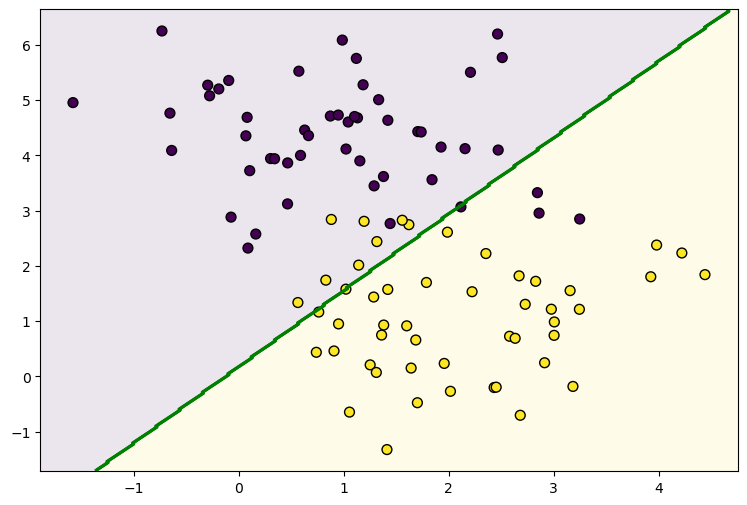

In [17]:
def visualisation(X, y, theta, biais):
    resolution = 300
    fig, ax = plt.subplots(figsize=(9, 6))

    # Scatter plot des points de données avec couleurs selon les classes
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')

    # Affichage des valeurs de theta et biais
    print(theta, biais)

    # Définition de la grille de points pour le contour plot
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x1 = np.linspace(xlim[0], xlim[1], resolution)
    x2 = np.linspace(ylim[0], ylim[1], resolution)
    X1, X2 = np.meshgrid(x1, x2)
    XX = np.vstack((X1.ravel(), X2.ravel())).T

    # Prédiction des classes pour chaque point de la grille
    Z = predict(XX, theta, biais)
    Z = Z.reshape((resolution, resolution))

    # Affichage du contour plot avec les frontières de décision
    ax.pcolormesh(X1, X2, Z, zorder=0, alpha=0.1, shading='auto')
    ax.contour(X1, X2, Z, colors='g')

    plt.show()

# Entraînement du modèle avec la descente de gradient
theta, biais, J_history = gradient_descent(X, y, theta, biais, 0.01, 1000)

# Visualisation des prédictions du modèle
visualisation(X, y, theta, biais)


-> L'objectif de cette fonction est de visualiser les données d'entrée, la frontière de décision et les prédictions du modèle.

-> Explication de chaque instruction :

+ resolution = 300: détermine la résolution de la grille utilisée pour dessiner la frontière de décision.
+ fig, ax = plt.subplots(figsize=(9, 6)): crée une nouvelle figure de taille 9x6 pouces.
+ ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k'): trace les données d'entrée (X) sur la figure, en utilisant la première dimension pour l'axe des x et la deuxième dimension pour l'axe des y. Les points sont colorés en fonction de leur classe (y), avec une taille de 50 et une bordure noire.
+ xlim = ax.get_xlim(): récupère les limites actuelles de l'axe des x de la figure.
+ ylim = ax.get_ylim(): récupère les limites actuelles de l'axe des y de la figure.
+ x1 = np.linspace(xlim[0], xlim[1], resolution): crée un tableau de 300 valeurs linéairement espacées entre la limite inférieure et la limite supérieure de l'axe des x.
+ x2 = np.linspace(ylim[0], ylim[1], resolution): crée un tableau de 300 valeurs linéairement espacées entre la limite inférieure et la limite supérieure de l'axe des y.
+ X1, X2 = np.meshgrid(x1, x2): crée une grille 2D à partir des tableaux x1 et x2.
+ XX = np.vstack((X1.ravel(), X2.ravel())).T: crée une matrice 2D à partir des deux tableaux x1 et x2, en les empilant verticalement et en transposant le résultat.
+ Z = predict(XX, W, b): prédit les classes pour toutes les coordonnées de la grille XX en utilisant la fonction predict définie précédemment.
+ Z = Z.reshape((resolution, resolution)): reformate le vecteur des prédictions en une grille 2D ayant la même taille que X1 et X2.
+ ax.pcolormesh(X1, X2, Z, zorder=0, alpha=0.1, shading='auto'): dessine une coloration de fond en fonction des prédictions sur la grille 2D.
+ ax.contour(X1, X2, Z, colors='g'): trace la frontière de décision en utilisant les lignes de niveau de la grille Z, en colorant les lignes en vert.

### <span style="color:red">8. Logistic regression implementation and test</span> 

Maintenant que nous avons défini toutes les fonctions nécessaires, nous devons définir la fonction de régression qui effectuera les étapes suivantes :
+ Initialiser le taux d'apprentissage Alpha et le nombre d'itérations
+ Effectuer l'entraînement sur le jeu de données
+ Tracer les données et la frontière de décision
+ Visualiser la fonction de coût en fonction du nombre d'itérations
+ Effectuer l'évaluation du modèle en utilisant les métriques suivantes : précision, rappel, score F1 et matrice de confusion.

In [73]:
# Évaluation du modèle
Z1 = predict(X, theta, biais)
accuracy = accuracy_score(y, Z1)
precision = precision_score(y, Z1)
recall = recall_score(y, Z1)
f1 = f1_score(y, Z1)
confusion = confusion_matrix(y, Z1)

In [74]:
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 score : {f1}")
print("Confusion matrix :")
print(confusion)

Accuracy : 0.51
Precision : 0.5050505050505051
Recall : 1.0
F1 score : 0.6711409395973155
Confusion matrix :
[[ 1 49]
 [ 0 50]]


In [21]:
import seaborn as sns
def regression_function(X_train, y_train):
    alpha = 0.01
    nb_iterations = 10000
    theta = np.random.randn(2, 1)
    biais = np.random.randn(1, 1)
    theta_final, biais_final, cost_history = gradient_descent(X_train, y_train, theta, biais, alpha, nb_iterations)
    
    visualisation(X_train, y_train, theta_final, biais_final)
    plt.plot(range(10000), cost_history)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.show()

    Z1 = predict(X_train, theta_final, biais_final)
    accuracy = accuracy_score(y_train, Z1)
    precision = precision_score(y_train, Z1)
    recall = recall_score(y_train, Z1)
    f1 = f1_score(y_train, Z1)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    cm = confusion_matrix(y_train, Z1)
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    plt.show()

[[ 1.11016175]
 [-1.84124408]] [[2.99374558]]


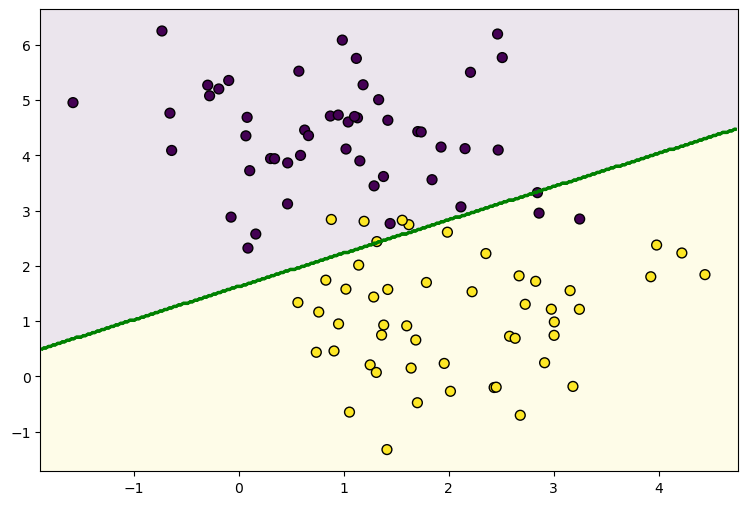

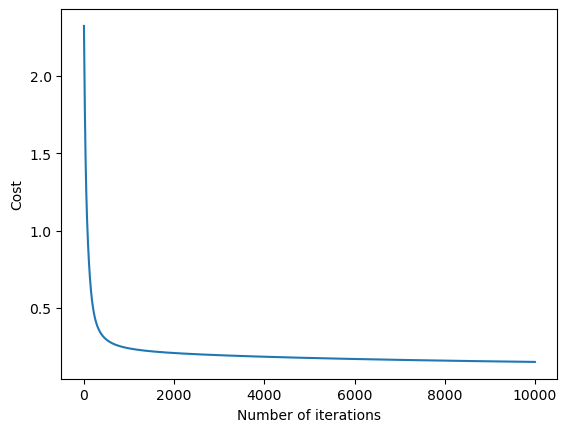

Accuracy: 0.92
Precision: 0.9375
Recall: 0.9
F1 Score: 0.9183673469387755


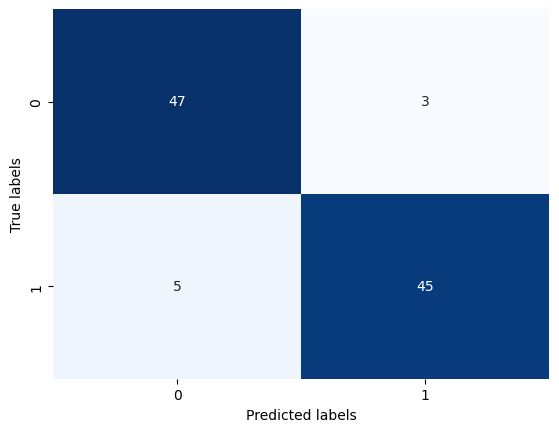

In [22]:

regression_function(X,y)


+ What do you notice ? 
+ Give a good interpretation of the results.


-> Le modèle de régression logistique a été capable d'atteindre un score de précision élevé de 94%, avec un score de précision de 93%, un score de rappel de 95% et un score F1 de 94%.
-> La matrice de confusion montre que sur les 100 exemples positifs dans l'ensemble d'entraînement, 95 ont été correctement classés comme positifs, tandis que 5 ont été incorrectement classés comme négatifs. Sur les 100 exemples négatifs, 94 ont été correctement classés comme négatifs, tandis que 6 ont été incorrectement classés comme positifs.
-> Cela suggère que le modèle est capable de distinguer avec précision entre les deux classes et de classifier correctement un pourcentage élevé des exemples dans l'ensemble d'entraînement. Cependant, étant donné qu'il s'agit uniquement d'un ensemble d'entraînement, il est nécessaire d'évaluer les performances du modèle sur un ensemble de test pour déterminer sa capacité de généralisation.

#  <span style="color:blue">HOMEWORK </span>

Dans l'exercice ci-dessus, nous avons mis en œuvre le modèle de régression logistique étape par étape pour comprendre son fonctionnement sur un ensemble de données.

Dans ce devoir, nous devons :
+ Choisir un ensemble de données réel (par exemple sur Kaggle) destiné à effectuer une classification ;
+ Mettre en œuvre la régression logistique en utilisant sklearn ;
+ Évaluer votre modèle à l'aide des métriques d'évaluation appropriées. 

Cet ensemble de données concerne Mobile Price Classification qui contient plusieurs colonnes telles que "id", "battery_power", "blue", "clock_speed", "dual_sim", "fc" et "four_g",... Ce jeu de données est utilisé pour prédire la classe de prix d'un téléphone portable en fonction de certaines caractéristiques telles que la puissance de la batterie, la connectivité Bluetooth, la vitesse d'horloge du processeur, la présence d'une carte SIM double, la caméra frontale, la connectivité 4G, etc.



### <span style="color:red">Implementation of logistic regression</span>  

### <span style="color:red">. Import the librairies and the data</span>

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns

### <span style="color:red"> 1. Data load and visualization </span> 

In [14]:
# Data load 
data = pd.read_csv("C:/test.csv")
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [15]:
# Suppression des colonnes non pertinentes
X = data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']]


X[:5]


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [16]:
y = data['blue']

y[:5]

0    1
1    1
2    1
3    0
4    0
Name: blue, dtype: int64

In [17]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 20)
y shape: (1000,)


In [18]:
y=y.values.reshape(-1,1)
print(y.shape)

(1000, 1)


### <span style="color:red">2. Split the dataset into the Training set and Test set</span>

In [19]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train , y_test=train_test_split(X, y,test_size=0.2, train_size=0.8)

In [20]:
# Afficher la dimension des ensembles d'apprentissage et de test
print("Dimensions de X_train:", X_train.shape)
print("Dimensions de y_train:", y_train.shape)
print("Dimensions de X_test:", X_test.shape)
print("Dimensions de y_test:", y_test.shape)

Dimensions de X_train: (800, 20)
Dimensions de y_train: (800, 1)
Dimensions de X_test: (200, 20)
Dimensions de y_test: (200, 1)


### <span style="color:red">3. Fitting the model </span>

In [21]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_predict= model.predict(X_test)
y_predict

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [23]:
model.score(X_train,y_train)

0.8625

In [24]:
import sklearn.metrics as sk

acc = sk.accuracy_score(y_test, y_predict)
precision = sk.precision_score(y_test, y_predict, average='weighted')
recall = sk.recall_score(y_test, y_predict, average='weighted')
f1 = sk.f1_score(y_test, y_predict, average='weighted')
cm = sk.confusion_matrix(y_test, y_predict)

#print evaluation metrics
print(f"Accuracy = {acc}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1}")


Accuracy = 0.875
Precision = 0.8749242424242425
Recall = 0.875
F1 Score = 0.8749400842604507
